**Introduction**:

For this project, I wanted to consider how novels are ranked, and whether or not certain variables create strange and skewed rankings. I chose to use the data set Top 500 Novels, which immediately suprised me because it put *Don Quixote* as number one. *Don Quixote* most certainly could *not* be the greatest novel of all time. And I say this as an English major. Who has ever said that *Don Quixote* was their favorite novel? Nobody. I quickly discovered as I combed through the data that what was skewing the data so heavily to stuffy books like *Don Quixote* and *The Scarlet Letter* were two interesting variables: OCLC_HOLDINGS and OCLC_TOTAL_EDITIONS. Meaning, the total number of a given book in world-wide libraries and the number of *editions* was heavily affecting the ranking of this list. Now, the first variable, number of library holdings, is actually quite useful. But the variable total editions really skews the data towards books that yes, have institutional recognition (which is good to consider for rankings), but also towards books that have many special, academic editions (think books with long, literary-academic introductions). If you scroll down past the ugly strings of code, you'll see a graph that should illustrate how odd it is for books like *Don Quixote* to be in a top ten list. As you can see, it doesn't even score well on average Goodreads ratings (it is in fact, ranked *318th* for highest goodreads rating).

__

__

__

__

<ipython-input-6-b8442f666526>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10['gr_num_ratings'] = pd.to_numeric(top_10['gr_num_ratings'].str.replace(',', ''), errors='coerce')


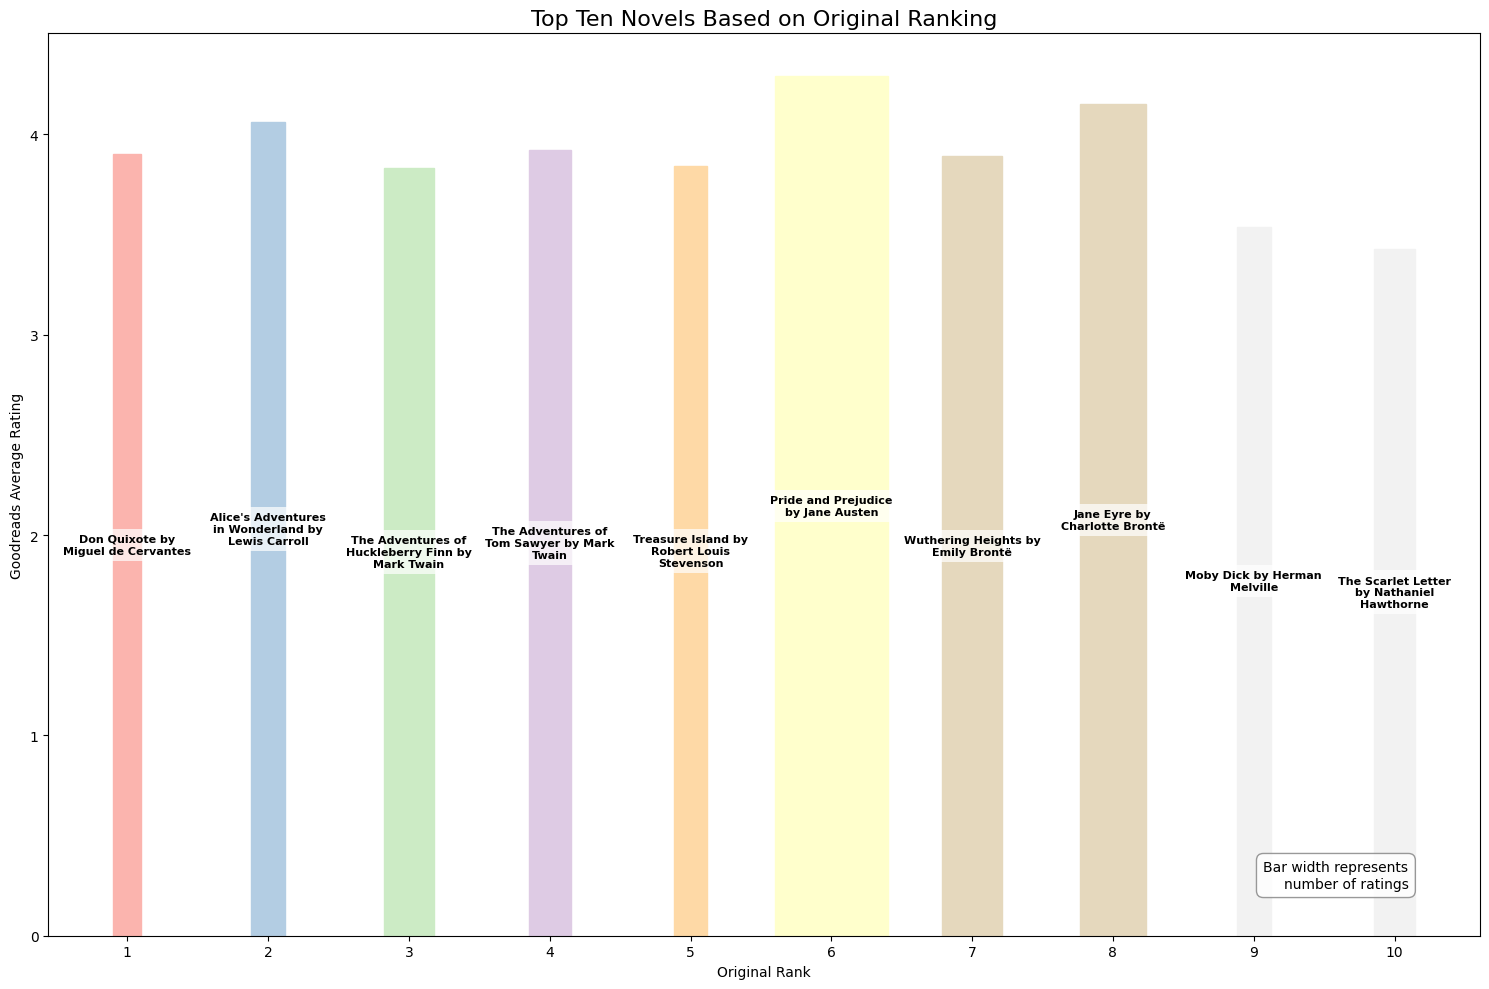

                                       title                  author  \
0                         <i>Don Quixote</i>     Miguel de Cervantes   
1    <i>Alice's Adventures in Wonderland</i>           Lewis Carroll   
2  <i>The Adventures of Huckleberry Finn</i>              Mark Twain   
3        <i>The Adventures of Tom Sawyer</i>              Mark Twain   
4                     <i>Treasure Island</i>  Robert Louis Stevenson   
5                 <i>Pride and Prejudice</i>             Jane Austen   
6                   <i>Wuthering Heights</i>            Emily Brontë   
7                           <i>Jane Eyre</i>        Charlotte Brontë   
8                           <i>Moby Dick</i>         Herman Melville   
9                  <i>The Scarlet Letter</i>     Nathaniel Hawthorne   

   gr_avg_rating  gr_num_ratings  
0           3.90          269435  
1           4.06          561016  
2           3.83         1262480  
3           3.92          931898  
4           3.84          486155

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
df = pd.read_csv('Top 500 Novels.csv')

# Get the top 10 novels based on their original ranking
top_10 = df.head(10)

# Convert gr_num_ratings to numeric, removing commas
top_10['gr_num_ratings'] = pd.to_numeric(top_10['gr_num_ratings'].str.replace(',', ''), errors='coerce')

# Create the plot
fig, ax = plt.subplots(figsize=(15, 10))

# Calculate bar widths based on number of ratings
max_width = 0.8
min_width = 0.2
widths = (top_10['gr_num_ratings'] - top_10['gr_num_ratings'].min()) / (top_10['gr_num_ratings'].max() - top_10['gr_num_ratings'].min())
widths = widths * (max_width - min_width) + min_width

# Plot bars
bars = ax.bar(range(1, 11), top_10['gr_avg_rating'], width=widths, align='center')

# Customize colors (light hues)
colors = plt.cm.Pastel1(np.linspace(0, 1, 10))
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Add labels and title
ax.set_xlabel('Original Rank')
ax.set_ylabel('Goodreads Average Rating')
ax.set_title('Top Ten Novels Based on Original Ranking', fontsize=16)
ax.set_xticks(range(1, 11))
ax.set_xticklabels(range(1, 11))

# Add a key for bar width
ax.text(0.95, 0.05, 'Bar width represents\nnumber of ratings',
        transform=ax.transAxes, fontsize=10, verticalalignment='bottom',
        horizontalalignment='right', bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='gray', alpha=0.8))

# Add book titles and authors on the bars
for bar, title, author in zip(bars, top_10['title'], top_10['author']):
    text = f"{title.replace('<i>', '').replace('</i>', '')}\nby {author}"
    words = text.split()
    lines = []
    current_line = []
    for word in words:
        if len(' '.join(current_line + [word])) > 20:  # Adjust 20 to change line length
            lines.append(' '.join(current_line))
            current_line = [word]
        else:
            current_line.append(word)
    if current_line:
        lines.append(' '.join(current_line))

    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2,
            '\n'.join(lines),
            ha='center', va='center', rotation=0, fontsize=8, fontweight='bold',
            wrap=True, bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

plt.tight_layout()
plt.show()

# Print the top 10 for verification
print(top_10[['title', 'author', 'gr_avg_rating', 'gr_num_ratings']])

__

__

__

__

**Shaking It Up:**

I then wanted to see how the ranking would differ if I based it on composite scores of specific variables. Although Claude gave me a little bit of a hard time, it did end up creating the code for me to visualize this (begrudingly). I wanted to visaulize a top ten list based on average Goodreads ratings times the number of Goodreads ratings. As you can imagine, you get a list that leans heavily towards the contemporary novel, with a few obvious J.K. Rowling cameos. But there were, suprisingly, a few classic novels that appeared, such as *Pride and Prejudice* and *1984*.

Note: The width of each bar is in proportion to the number of ratings that book has.

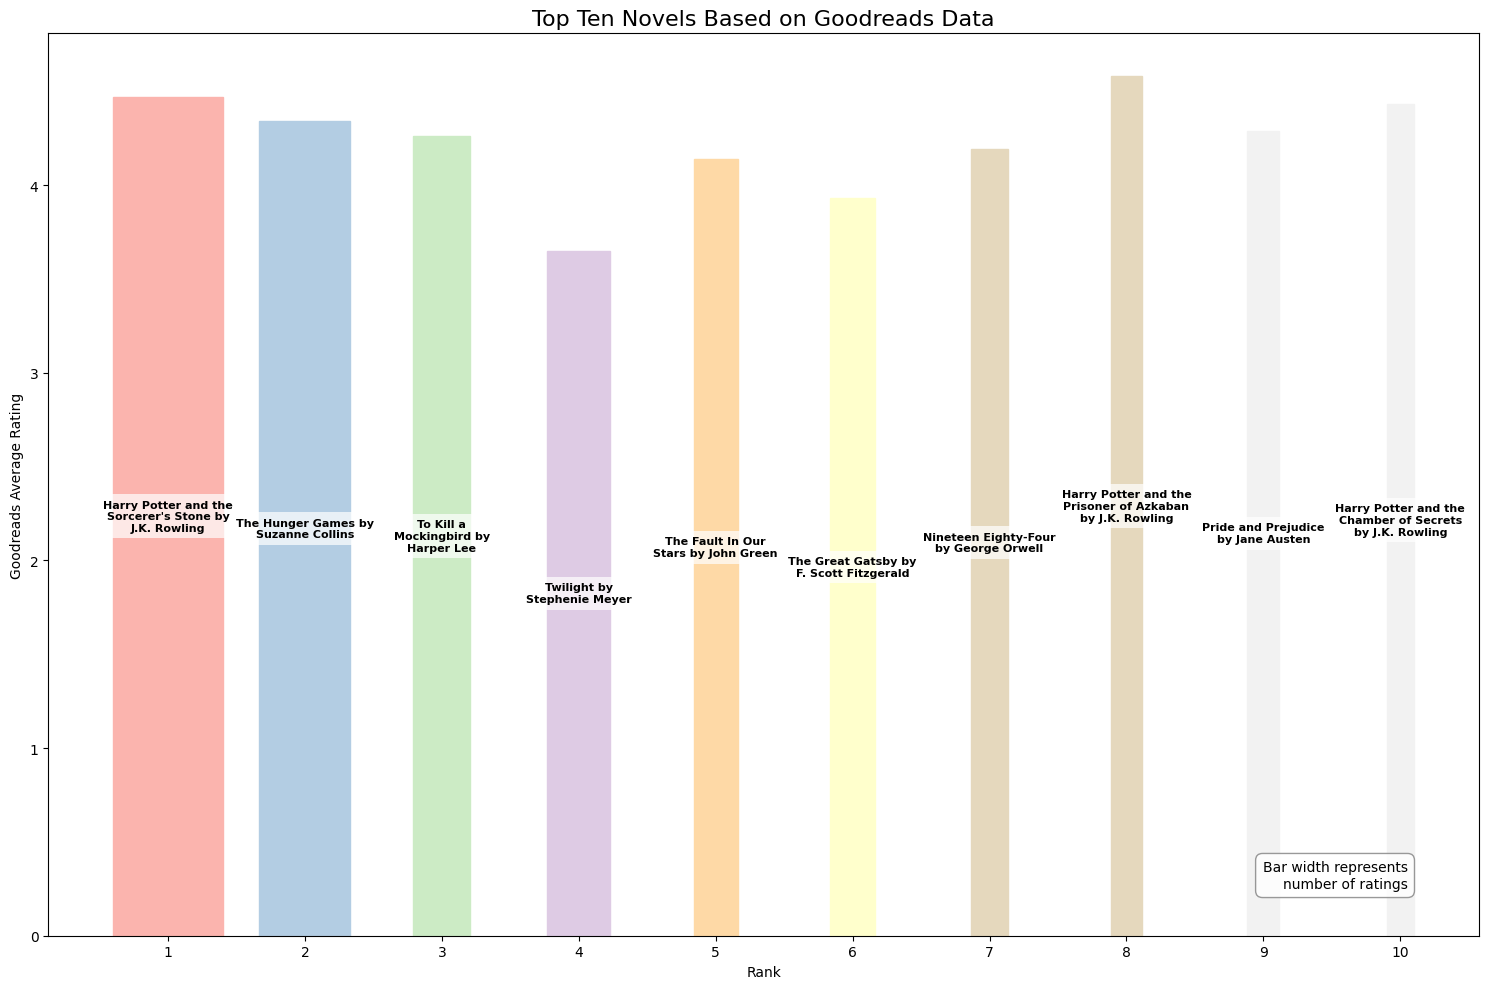

                                               title               author  \
44      <i>Harry Potter and the Sorcerer's Stone</i>         J.K. Rowling   
172                          <i>The Hunger Games</i>      Suzanne Collins   
28                      <i>To Kill a Mockingbird</i>           Harper Lee   
131                                  <i>Twilight</i>      Stephenie Meyer   
302                    <i>The Fault In Our Stars</i>           John Green   
33                           <i>The Great Gatsby</i>  F. Scott Fitzgerald   
85                       <i>Nineteen Eighty-Four</i>        George Orwell   
102  <i>Harry Potter and the Prisoner of Azkaban</i>         J.K. Rowling   
5                         <i>Pride and Prejudice</i>          Jane Austen   
65    <i>Harry Potter and the Chamber of Secrets</i>         J.K. Rowling   

     gr_avg_rating  gr_num_ratings  composite_score  
44            4.47         9977698      44600310.06  
172           4.34         8603378      3733

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
df = pd.read_csv('Top 500 Novels.csv')

# Correctly convert ratings to numeric
df['gr_avg_rating'] = pd.to_numeric(df['gr_avg_rating'], errors='coerce')
df['gr_num_ratings'] = pd.to_numeric(df['gr_num_ratings'].str.replace(',', ''), errors='coerce')

# Calculate the composite score
df['composite_score'] = df['gr_avg_rating'] * df['gr_num_ratings']

# Sort by composite score and get top 10
top_10 = df.sort_values('composite_score', ascending=False).head(10)

# Create the plot
fig, ax = plt.subplots(figsize=(15, 10))

# Calculate bar widths based on number of ratings
max_width = 0.8
min_width = 0.2
widths = (top_10['gr_num_ratings'] - top_10['gr_num_ratings'].min()) / (top_10['gr_num_ratings'].max() - top_10['gr_num_ratings'].min())
widths = widths * (max_width - min_width) + min_width

# Plot bars
bars = ax.bar(range(1, 11), top_10['gr_avg_rating'], width=widths, align='center')

# Customize colors (light hues)
colors = plt.cm.Pastel1(np.linspace(0, 1, 10))
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Add labels and title
ax.set_xlabel('Rank')
ax.set_ylabel('Goodreads Average Rating')
ax.set_title('Top Ten Novels Based on Goodreads Data', fontsize=16)
ax.set_xticks(range(1, 11))
ax.set_xticklabels(range(1, 11))

# Add a key for bar width
ax.text(0.95, 0.05, 'Bar width represents\nnumber of ratings',
        transform=ax.transAxes, fontsize=10, verticalalignment='bottom',
        horizontalalignment='right', bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='gray', alpha=0.8))

# Add book titles and authors on the bars
for bar, title, author in zip(bars, top_10['title'], top_10['author']):
    text = f"{title.replace('<i>', '').replace('</i>', '')}\nby {author}"
    words = text.split()
    lines = []
    current_line = []
    for word in words:
        if len(' '.join(current_line + [word])) > 20:  # Adjust 20 to change line length
            lines.append(' '.join(current_line))
            current_line = [word]
        else:
            current_line.append(word)
    if current_line:
        lines.append(' '.join(current_line))

    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2,
            '\n'.join(lines),
            ha='center', va='center', rotation=0, fontsize=8, fontweight='bold',
            wrap=True, bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

plt.tight_layout()
plt.show()

# Print the top 10 for verification
print(top_10[['title', 'author', 'gr_avg_rating', 'gr_num_ratings', 'composite_score']])

__

__

__

__

**Sizing Each Other Up:**

I then visualized both top ten lists side by side. As you can see, the original top ten list almost always has a lower average Goodreads rating compared to the new list. Notice also, that the orginal list has much wider bars than the new list, which indicates how heavily the number of library holdings played into the orginal ranking.

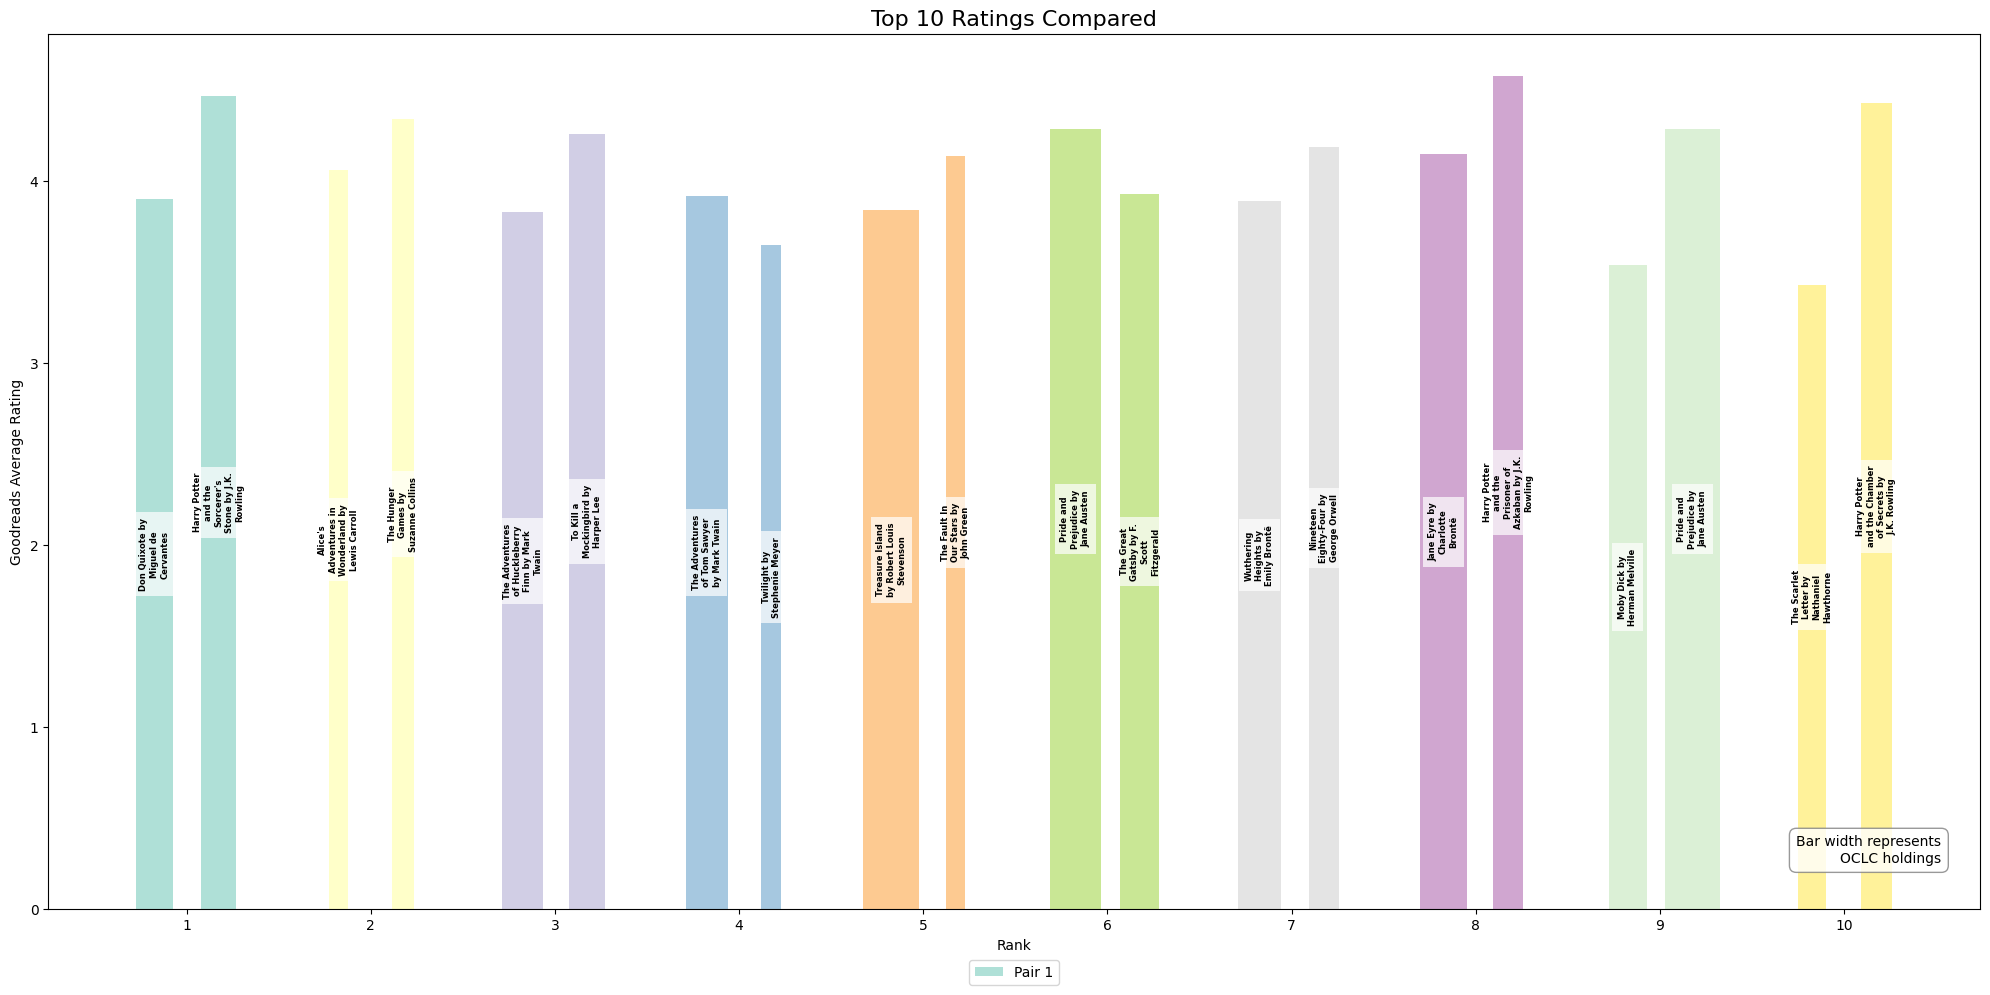

Original Top 10:
                                       title                  author  \
0                         <i>Don Quixote</i>     Miguel de Cervantes   
1    <i>Alice's Adventures in Wonderland</i>           Lewis Carroll   
2  <i>The Adventures of Huckleberry Finn</i>              Mark Twain   
3        <i>The Adventures of Tom Sawyer</i>              Mark Twain   
4                     <i>Treasure Island</i>  Robert Louis Stevenson   
5                 <i>Pride and Prejudice</i>             Jane Austen   
6                   <i>Wuthering Heights</i>            Emily Brontë   
7                           <i>Jane Eyre</i>        Charlotte Brontë   
8                           <i>Moby Dick</i>         Herman Melville   
9                  <i>The Scarlet Letter</i>     Nathaniel Hawthorne   

   gr_avg_rating  oclc_holdings  
0           3.90        30840.0  
1           4.06        24125.0  
2           3.83        32602.0  
3           3.92        32602.0  
4           3.84    

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('Top 500 Novels.csv')

# Convert gr_avg_rating, gr_num_ratings, and oclc_holdings to numeric
df['gr_avg_rating'] = pd.to_numeric(df['gr_avg_rating'], errors='coerce')
df['gr_num_ratings'] = pd.to_numeric(df['gr_num_ratings'].str.replace(',', ''), errors='coerce')
# Check if 'oclc_holdings' is of type object (string) before applying str.replace
if df['oclc_holdings'].dtype == object:
    df['oclc_holdings'] = pd.to_numeric(df['oclc_holdings'].str.replace(',', ''), errors='coerce')
else:
    # If not string type, assume it's already numeric or can be coerced directly
    df['oclc_holdings'] = pd.to_numeric(df['oclc_holdings'], errors='coerce')

# Calculate composite score
df['composite_score'] = df['gr_avg_rating'] * df['gr_num_ratings']

# Get original top 10 and composite top 10
original_top_10 = df.head(10)
composite_top_10 = df.sort_values('composite_score', ascending=False).head(10)

# Create the plot
fig, ax = plt.subplots(figsize=(20, 10))

# Set bar positions
x = np.arange(10)
width = 0.35

# Calculate bar widths based on oclc_holdings
max_width = 0.3
min_width = 0.1
orig_widths = (original_top_10['oclc_holdings'] - original_top_10['oclc_holdings'].min()) / (original_top_10['oclc_holdings'].max() - original_top_10['oclc_holdings'].min())
orig_widths = orig_widths * (max_width - min_width) + min_width
comp_widths = (composite_top_10['oclc_holdings'] - composite_top_10['oclc_holdings'].min()) / (composite_top_10['oclc_holdings'].max() - composite_top_10['oclc_holdings'].min())
comp_widths = comp_widths * (max_width - min_width) + min_width

# Reset index of composite_top_10 to ensure it starts from 0
composite_top_10 = composite_top_10.reset_index(drop=True)

# ... (rest of the code)

# Plot bars
colors = plt.cm.Set3(np.linspace(0, 1, 10))
for i in range(10):
    ax.bar(x[i] - width/2, original_top_10.iloc[i]['gr_avg_rating'], width=orig_widths.iloc[i], color=colors[i], alpha=0.7, label=f'Pair {i+1}' if i == 0 else "")
    # Access comp_widths using .iloc[i] to align with the reset index of composite_top_10
    ax.bar(x[i] + width/2, composite_top_10.iloc[i]['gr_avg_rating'], width=comp_widths.iloc[i], color=colors[i], alpha=0.7)

# Add labels and title
ax.set_xlabel('Rank')
ax.set_ylabel('Goodreads Average Rating')
ax.set
ax.set_title('Top 10 Ratings Compared', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(range(1, 11))

# Add a key for bar width
ax.text(0.98, 0.05, 'Bar width represents\nOCLC holdings',
        transform=ax.transAxes, fontsize=10, verticalalignment='bottom',
        horizontalalignment='right', bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='gray', alpha=0.8))

# Add book titles and authors on the bars
for i, (orig, comp) in enumerate(zip(original_top_10.itertuples(), composite_top_10.itertuples())):
    for j, book in enumerate([orig, comp]):
        text = f"{book.title.replace('<i>', '').replace('</i>', '')}\nby {book.author}"
        words = text.split()
        lines = []
        current_line = []
        for word in words:
            if len(' '.join(current_line + [word])) > 15:
                lines.append(' '.join(current_line))
                current_line = [word]
            else:
                current_line.append(word)
        if current_line:
            lines.append(' '.join(current_line))

        ax.text(i + (j-0.5)*width, book.gr_avg_rating/2,
                '\n'.join(lines),
                ha='center', va='center', rotation=90, fontsize=6, fontweight='bold',
                wrap=True, bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=5)
plt.tight_layout()
plt.show()

# Print the lists for verification
print("Original Top 10:")
print(original_top_10[['title', 'author', 'gr_avg_rating', 'oclc_holdings']])
print("\nComposite Score Top 10:")
print(composite_top_10[['title', 'author', 'gr_avg_rating', 'gr_num_ratings', 'oclc_holdings', 'composite_score']])

__

__

__

__

**A Different Way:**

I then tried a different way of ranking books. This time, I had Claude rank the the top ten books based on average Goodreads rating and number of library holdings. What you get is a very similar list to the orginal ranking, but perhaps a little more realistic. Although no major crowd favorites feature on this list—and the dreaded *Don Quixote* makes it in 8th place—there are more books of recognizeable and popular merit. *Pride and Prejudice* is suitably at first place (I should note that while I am rather biased to the Jane Eyre's and Jane Austen's of literary lists, these are not *my* favorite books so I'm not wholly unreliable in this assessment...) given that it's a novel with literary merit, institutional recognition, and popular acclaim. Many non-academic readers adore *Pride and Prejudice*. The same goes for books like *Little Women*.

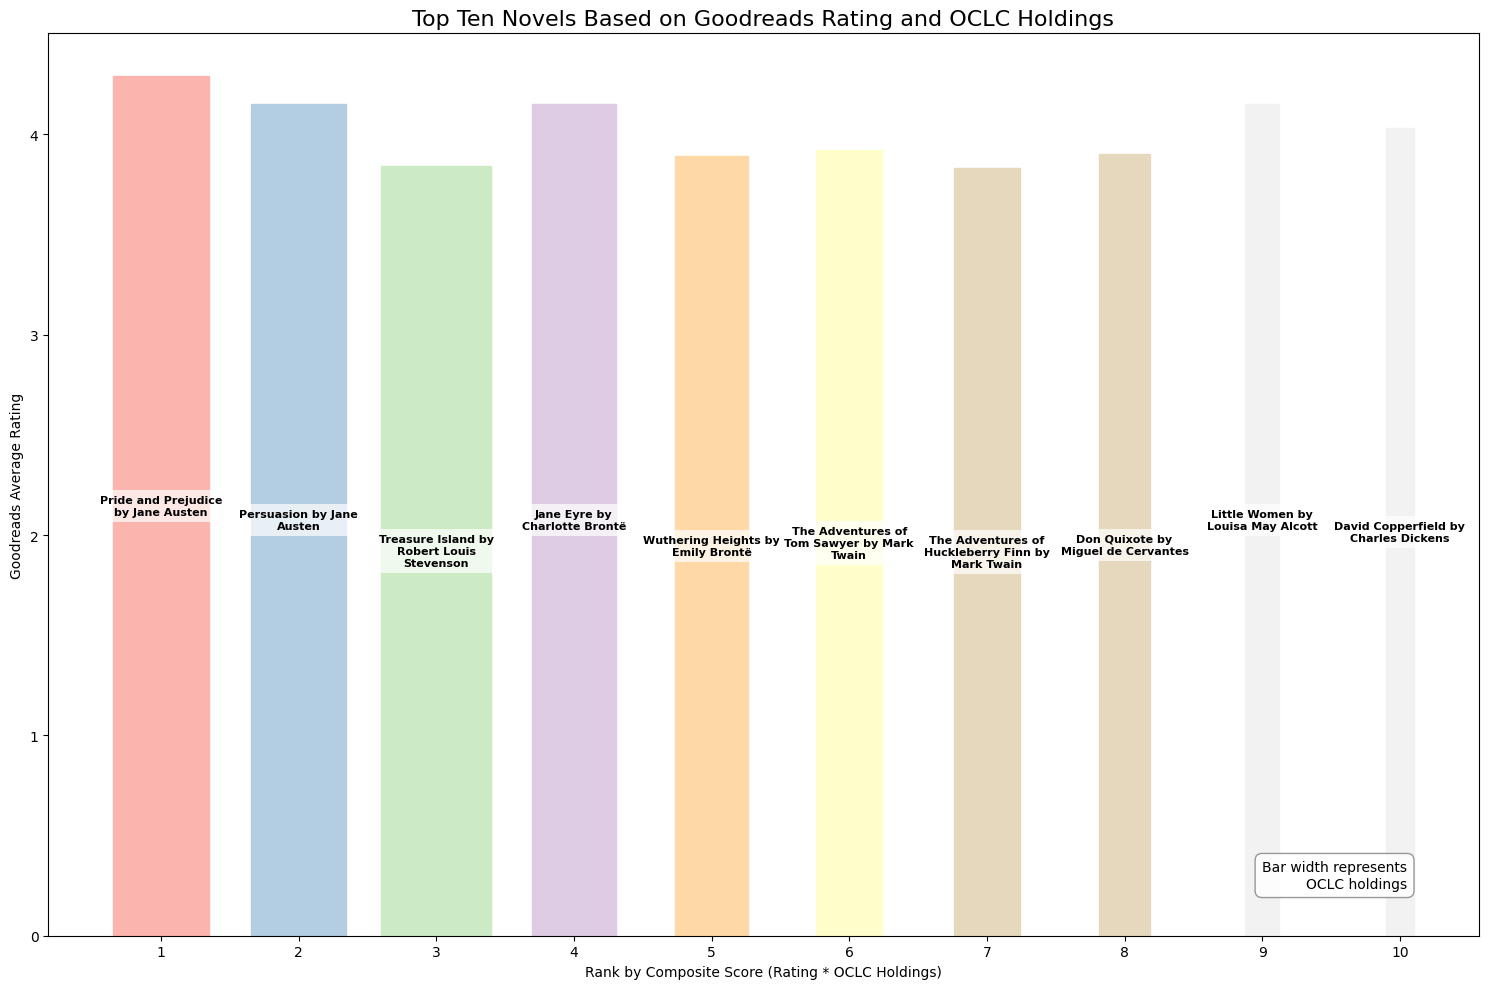

                                        title                  author  \
5                  <i>Pride and Prejudice</i>             Jane Austen   
88                          <i>Persuasion</i>             Jane Austen   
4                      <i>Treasure Island</i>  Robert Louis Stevenson   
7                            <i>Jane Eyre</i>        Charlotte Brontë   
6                    <i>Wuthering Heights</i>            Emily Brontë   
3         <i>The Adventures of Tom Sawyer</i>              Mark Twain   
2   <i>The Adventures of Huckleberry Finn</i>              Mark Twain   
0                          <i>Don Quixote</i>     Miguel de Cervantes   
15                        <i>Little Women</i>       Louisa May Alcott   
13                   <i>David Copperfield</i>         Charles Dickens   

    gr_avg_rating  oclc_holdings  composite_score  
5            4.29        36023.0        154538.67  
88           4.15        36023.0        149495.45  
4            3.84        37702.0        

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
df = pd.read_csv('Top 500 Novels.csv')

# Convert gr_avg_rating and oclc_holdings to numeric, handling any issues
df['gr_avg_rating'] = pd.to_numeric(df['gr_avg_rating'], errors='coerce')
df['oclc_holdings'] = pd.to_numeric(df['oclc_holdings'].astype(str).str.replace(',', ''), errors='coerce')

# Calculate the composite score
df['composite_score'] = df['gr_avg_rating'] * df['oclc_holdings']

# Sort by composite score and get top 10
top_10 = df.sort_values('composite_score', ascending=False).head(10)

# Create the plot
fig, ax = plt.subplots(figsize=(15, 10))

# Calculate bar widths based on oclc_holdings
max_width = 0.8
min_width = 0.2
widths = (top_10['oclc_holdings'] - top_10['oclc_holdings'].min()) / (top_10['oclc_holdings'].max() - top_10['oclc_holdings'].min())
widths = widths * (max_width - min_width) + min_width

# Plot bars
bars = ax.bar(range(1, 11), top_10['gr_avg_rating'], width=widths, align='center')

# Customize colors (light hues)
colors = plt.cm.Pastel1(np.linspace(0, 1, 10))
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Add labels and title
ax.set_xlabel('Rank by Composite Score (Rating * OCLC Holdings)')
ax.set_ylabel('Goodreads Average Rating')
ax.set_title('Top Ten Novels Based on Goodreads Rating and OCLC Holdings', fontsize=16)
ax.set_xticks(range(1, 11))
ax.set_xticklabels(range(1, 11))

# Add a key for bar width
ax.text(0.95, 0.05, 'Bar width represents\nOCLC holdings',
        transform=ax.transAxes, fontsize=10, verticalalignment='bottom',
        horizontalalignment='right', bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='gray', alpha=0.8))

# Add book titles and authors on the bars
for bar, title, author in zip(bars, top_10['title'], top_10['author']):
    text = f"{title.replace('<i>', '').replace('</i>', '')}\nby {author}"
    words = text.split()
    lines = []
    current_line = []
    for word in words:
        if len(' '.join(current_line + [word])) > 20:  # Adjust 20 to change line length
            lines.append(' '.join(current_line))
            current_line = [word]
        else:
            current_line.append(word)
    if current_line:
        lines.append(' '.join(current_line))

    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2,
            '\n'.join(lines),
            ha='center', va='center', rotation=0, fontsize=8, fontweight='bold',
            wrap=True, bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

plt.tight_layout()
plt.show()

# Print the top 10 for verification
print(top_10[['title', 'author', 'gr_avg_rating', 'oclc_holdings', 'composite_score']])

__

__

__

__

**In Conclusion:**

Are my final rankings accurate? I'm not sure that it is entirely—but maybe it's a little bit better than the orginal. I think my concluding thoughts on this data set (and on the greatest novels of all time) is that popular acclaim and insitutional recognition should both be held in tension. Right now, the data set is still heavily skewed towards library recognition. But a ranking strictly based on Goodreads ratings is not necessarily so good either. *Twightlight* made *that* list, remember?

What we need is another variable that was similar to library holdings but was weighted just a little differently. Maybe a Rottentomatos critics score for classics?

Whatever it is—we just can't have *Don Quixote* or *The Hunger Games* in the top ten.